# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [21]:
pip install yfinance

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

En un análisis financiero resulta más confiable emplear el precio de cierre ajustado (Adj Close) porque incorpora las modificaciones que sufre la acción a lo largo del tiempo por dividendos, splits u otros eventos corporativos. De esta manera, refleja de forma más fiel cuánto habría ganado o perdido realmente un inversionista que mantuvo la acción. En cambio, el campo Close muestra únicamente el precio al final de la jornada, sin correcciones, lo cual puede distorsionar la medición de rendimientos históricos.
En cuanto al error en pandas, el KeyError aparece cuando se intenta acceder a una columna inexistente dentro del DataFrame. Esto ocurre porque la librería yfinance cambió recientemente su configuración: antes devolvía explícitamente “Adj Close”, pero ahora, con el parámetro auto_adjust=True activado por defecto, ya no incluye esa columna. Lo que aparece como “Close” corresponde directamente al precio ajustado. Por ello, si se busca “Adj Close”, Python no la encuentra y genera el error.

In [3]:
import yfinance as yf
tickers = ['GOOG','AMZN','MSFT']
start = '2022-09-17'
end   = '2025-09-17'

# Forzar que devuelva la columna 'Adj Close'
datos = yf.download(tickers, start=start, end=end, auto_adjust=False)['Adj Close']
datos.head(5)

[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-09-19,124.660004,103.144165,238.584885
2022-09-20,122.190002,101.137894,236.565094
2022-09-21,118.540001,99.330269,233.150070
2022-09-22,117.309998,99.886459,235.130814
2022-09-23,113.779999,98.495956,232.145096


In [4]:
datos.tail(5) # Veo los últimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-10,230.330002,239.559998,500.369995
2025-09-11,229.949997,240.779999,501.010010
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009


##3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 Pregunta: ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

In [49]:
import matplotlib.pyplot as plt


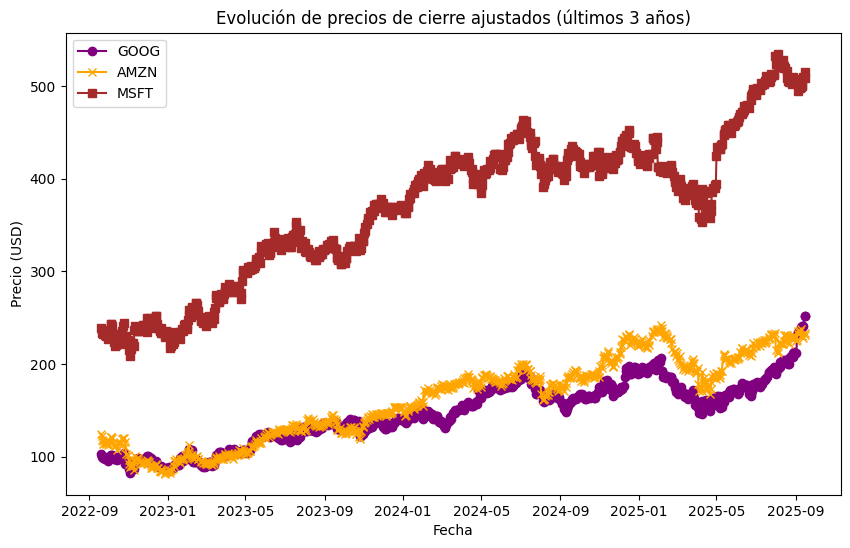

In [35]:
plt.figure(figsize=(10,6))

plt.plot(datos["GOOG"], label="GOOG", color="purple", marker='o', linestyle='-')
plt.plot(datos["AMZN"], label="AMZN", color="orange", marker='x', linestyle='-')
plt.plot(datos["MSFT"], label="MSFT", color="brown", marker='s', linestyle='-')


plt.title("Evolución de precios de cierre ajustados (últimos 3 años)")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

#¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

📊 Comparación de precios en 3 años:

AMZN:
   Precio inicial: 124.66 USD
   Precio final:   234.05 USD
   Diferencia:     109.39 USD

GOOG:
   Precio inicial: 103.14 USD
   Precio final:   251.42 USD
   Diferencia:     148.28 USD

MSFT:
   Precio inicial: 238.58 USD
   Precio final:   509.04 USD
   Diferencia:     270.46 USD

🏆 La acción con mayor crecimiento absoluto en precio es: MSFT


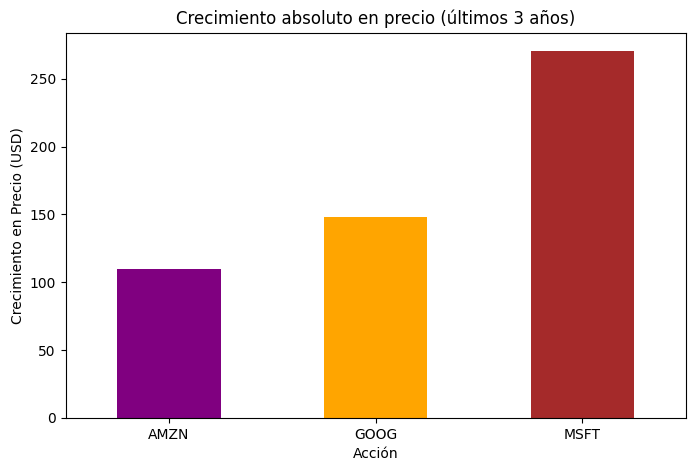

In [34]:
# Precios iniciales y finales
precios_iniciales = datos.iloc[0]
precios_finales = datos.iloc[-1]

# Calcular diferencias
diferencias = precios_finales - precios_iniciales

# Mostrar resultados
print("📊 Comparación de precios en 3 años:\n")
for ticker in datos.columns:
    print(f"{ticker}:")
    print(f"   Precio inicial: {precios_iniciales[ticker]:.2f} USD")
    print(f"   Precio final:   {precios_finales[ticker]:.2f} USD")
    print(f"   Diferencia:     {diferencias[ticker]:.2f} USD\n")

# Identificar la acción con mayor crecimiento
ganador = diferencias.idxmax()
print(f"🏆 La acción con mayor crecimiento absoluto en precio es: {ganador}")

# Create a bar chart to visualize the growth
plt.figure(figsize=(8, 5))
diferencias.plot(kind='bar', color=['purple', 'orange', 'brown'])
plt.title("Crecimiento absoluto en precio (últimos 3 años)")
plt.xlabel("Acción")
plt.ylabel("Crecimiento en Precio (USD)")
plt.xticks(rotation=0)
plt.show()


## 4. Rentabilidades
Calcula las rentabilidades logarítmicas diarias y grafícalas.

🔎 Pregunta: ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?
Si miramos solo los precios, lo que vemos es cuánto cuesta hoy una acción frente a lo que costaba antes. En tu ejemplo:

AMZN pasó de 124.66 a 234.05 USD (+109.39).

GOOG pasó de 103.14 a 251.42 USD (+148.28).

MSFT pasó de 238.58 a 509.04 USD (+270.46).

Estos valores absolutos parecen decir que Microsoft “ganó más” porque la diferencia es mayor, pero esto puede ser engañoso: no todas las acciones parten del mismo nivel.

Al observar las rentabilidades, en cambio, se mide el cambio en términos relativos, es decir, el crecimiento proporcional respecto al valor inicial:

AMZN: 109.39 / 124.66 ≈ 87.8%

GOOG: 148.28 / 103.14 ≈ 143.8%

MSFT: 270.46 / 238.58 ≈ 113.4%

Aquí la historia cambia: Google, a pesar de tener una diferencia en dólares más
pequeña que Microsoft, es la acción que más se valorizó en proporción a su precio inicial.

En resumen:

Precios absolutos → dicen cuánto vale una acción en un momento dado.

Rentabilidades → muestran cuánto ha crecido o decrecido ese valor en relación con su punto de partida, lo cual permite comparar de manera justa activos distintos.
#Formula

In [36]:
# Calcular rentabilidades logarítmicas diarias
rendimientos = np.log(datos / datos.shift(1))
rendimientos.head()


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-09-19,NaN,NaN,NaN
2022-09-20,-0.020013,-0.019643,-0.008502
2022-09-21,-0.030327,-0.018035,-0.014541
2022-09-22,-0.010430,0.005584,0.008460
2022-09-23,-0.030553,-0.014019,-0.012779


In [41]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=rendimientos.index, y=rendimientos["GOOG"], mode='lines', name='GOOG'))
fig.add_trace(go.Scatter(x=rendimientos.index, y=rendimientos["AMZN"], mode='lines', name='AMZN'))
fig.add_trace(go.Scatter(x=rendimientos.index, y=rendimientos["MSFT"], mode='lines', name='MSFT'))

fig.update_layout(
    title="Rentabilidades logarítmicas diarias",
    xaxis_title="Fecha",
    yaxis_title="Rentabilidad logarítmica",
    hovermode="x unified"
)

fig.show()

El uso del rendimiento logarítmico permite convertir los precios de un activo en tasas de rentabilidad. Los precios por sí solos únicamente reflejan cuánto vale un activo en un instante específico, pero las rentabilidades evidencian la variación de esos precios a lo largo del tiempo. Este enfoque resulta clave para evaluar el desempeño, contrastar diferentes activos y aplicar modelos de análisis financiero o estadístico. Por ello, más que trabajar directamente con precios, se opta por estudiar las rentabilidades.

#5. Medidas estadísticas
Calcula la rentabilidad promedio y la volatilidad (desviación estándar) de cada acción.



In [13]:
media = rendimientos.mean()
volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
print(media)

print("\nVolatilidad diaria:")
print(volatilidad)

Rentabilidad promedio diaria:
Ticker
AMZN    0.000840
GOOG    0.001188
MSFT    0.001010
dtype: float64

Volatilidad diaria:
Ticker
AMZN    0.021304
GOOG    0.019858
MSFT    0.015998
dtype: float64


🔎 Pregunta: ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

La rentabilidad promedio diaria más alta la presenta GOOG (0.001188), seguido de MSFT (0.001100) y, finalmente, AMZN (0.000840). Esto significa que, en términos de retorno esperado, la acción de Google ofrece un mayor rendimiento frente a las otras dos.
En cuanto al riesgo, que se mide a través de la volatilidad, la acción más riesgosa es AMZN (0.021304), ya que tiene la mayor desviación estándar, lo que indica mayor variabilidad en sus rendimientos diarios. Por el contrario, MSFT (0.015998) y GOOG (0.019588) muestran una volatilidad más baja, siendo Microsoft la opción relativamente más estable.

Es decir:

Acción más riesgosa: Amazon (AMZN).

Acción con mayor retorno: Google (GOOG).

Este contraste refleja el clásico dilema riesgo-retorno: Amazon implica más incertidumbre en sus movimientos diarios, mientras que Google brinda una mejor expectativa de rentabilidad con un nivel de riesgo intermedio.

In [42]:
# Identificar acción con mayor retorno
accion_mayor_retorno = media.idxmax()
mayor_retorno = media.max()

# Identificar acción más riesgosa
accion_mas_riesgosa = volatilidad.idxmax()
mayor_riesgo = volatilidad.max()

print("\n📌 Conclusión:")
print(f"La acción con mayor retorno es {accion_mayor_retorno} con {mayor_retorno:.4f}")
print(f"La acción más riesgosa es {accion_mas_riesgosa} con {mayor_riesgo:.4f}")


📌 Conclusión:
La acción con mayor retorno es GOOG con 0.0012
La acción más riesgosa es AMZN con 0.0213


/tmp/ipython-input-2866911491.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



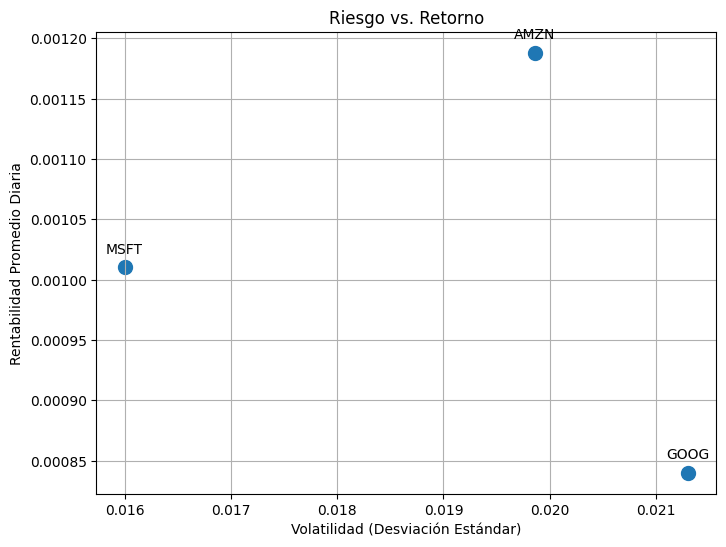

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(volatilidad, media, s=100) # s is the size of the markers
plt.title("Riesgo vs. Retorno")
plt.xlabel("Volatilidad (Desviación Estándar)")
plt.ylabel("Rentabilidad Promedio Diaria")

# Add labels for each stock
for i, ticker in enumerate(tickers):
    plt.annotate(ticker, (volatilidad[i], media[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()


#6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

Matriz de correlación entre acciones:
Ticker      AMZN      GOOG      MSFT
Ticker                              
AMZN    1.000000  0.614849  0.653397
GOOG    0.614849  1.000000  0.601010
MSFT    0.653397  0.601010  1.000000


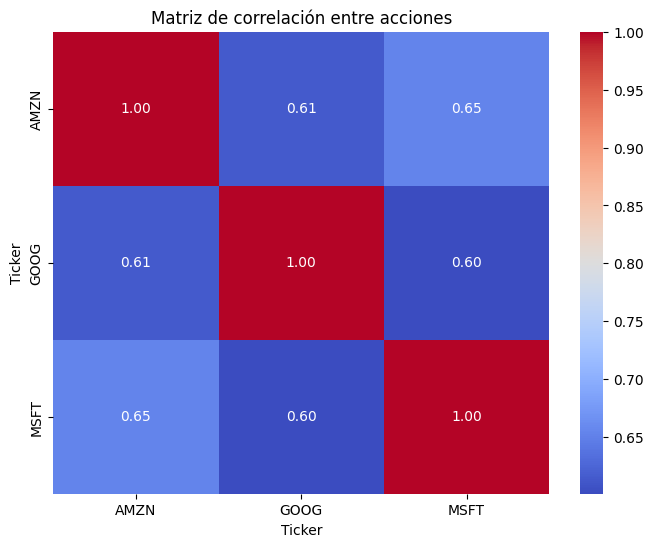

In [47]:
# Calculate the correlation matrix
correlacion = rendimientos.corr()
print("Matriz de correlación entre acciones:")
print(correlacion)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre acciones")
plt.show()

#Interpretación de la correlación entre acciones

La matriz de correlación muestra que las tres acciones analizadas se mueven de manera bastante similar, aunque no de forma perfecta. Todas presentan valores positivos superiores a 0.60, lo que significa que existe una relación lineal moderada a fuerte entre ellas: cuando una de estas compañías experimenta un alza o una caída, las otras tienden a seguir el mismo patrón.

El caso más destacado es la relación entre AMZN y MSFT (0.65), que refleja la conexión más estrecha dentro del grupo, seguida muy de cerca por las correlaciones de AMZN con GOOG (0.61) y de GOOG con MSFT (0.60). Estos valores sugieren que, aunque cada empresa tiene su propio comportamiento y particularidades, las tres están influenciadas por dinámicas comunes del mercado, propias de grandes tecnológicas.

En conclusión, ninguna de estas acciones funciona como un verdadero elemento de diversificación frente a las demás, ya que todas responden de manera parecida a los cambios del entorno económico. Esto implica que, para reducir riesgo mediante diversificación, sería necesario incluir activos de otros sectores o con correlaciones mucho más bajas o negativas.

#7. Portafolio simulado
Supón un portafolio con la siguiente distribución:


40% Google

30% Amazon

30% Microsoft

Calcula el retorno esperado y la volatilidad del portafolio.

🔎 Preguntas:

¿Cómo interpretas el retorno esperado del portafolio?

¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

In [44]:
import numpy as np

# Pesos del portafolio (Google 40%, Amazon 30%, Microsoft 30%)
pesos = np.array([0.4, 0.3, 0.3])

# Retorno esperado del portafolio (diario)
retorno_portafolio = np.dot(pesos, rendimientos.mean())

# Matriz de covarianzas de las rentabilidades (diaria)
covarianza = rendimientos.cov()

# Volatilidad del portafolio (diaria)
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos)))


print("Retorno esperado del portafolio (diario):", retorno_portafolio)
print("Volatilidad del portafolio (diario):", vol_portafolio)

Retorno esperado del portafolio (diario): 0.0009954899686524148
Volatilidad del portafolio (diario): 0.01677466192699389


##¿Cómo interpretas el retorno esperado del portafolio?
El cálculo muestra que el retorno esperado diario del portafolio es 0.000995 (≈0.0995%). Esto significa que, en promedio, el portafolio generaría una ganancia cercana al 0.1% por cada día de inversión, siempre y cuando los rendimientos históricos se mantengan en el futuro.

En otras palabras, no se trata de una ganancia garantizada, sino de una expectativa estadística: si se repitieran muchos días de mercado bajo condiciones similares, el rendimiento promedio tendería a estar alrededor de ese valor.

Si lo pensamos a un horizonte más largo, el retorno diario puede anualizarse (multiplicando por la cantidad de días bursátiles en un año, usualmente 252). Así se obtiene una aproximación de lo que el inversionista podría esperar en el año, aunque siempre sujeto a la volatilidad y a los riesgos propios del mercado.


In [50]:
import numpy as np

# Pesos del portafolio (Google 40%, Amazon 30%, Microsoft 30%)
pesos = np.array([0.4, 0.3, 0.3])

# Retorno esperado del portafolio (diario)
retorno_portafolio = np.dot(pesos, rendimientos.mean())

# Conversión a anual
retorno_anual = retorno_portafolio * 252

print("Retorno esperado del portafolio (anual):", retorno_anual)

Retorno esperado del portafolio (anual): 0.25086347210040855


##¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?
La volatilidad calculada para el portafolio (1.67% diaria) refleja claramente el aporte de la diversificación. Si hubieras invertido todo el capital en una sola acción, habrías quedado expuesto a la totalidad de sus oscilaciones individuales, que en algunos casos superan el nivel de riesgo del portafolio.

Al mezclar Google, Amazon y Microsoft en proporciones distintas, las variaciones de unas se compensan parcialmente con las de otras, gracias a que sus movimientos no son idénticos (sus correlaciones son altas, pero no perfectas). Ese “desajuste” entre ellas es lo que genera un beneficio: la volatilidad conjunta resulta menor que la suma de los riesgos individuales.

En términos prácticos, la diversificación suaviza el comportamiento del portafolio, ofreciendo un retorno esperado competitivo, pero con menos sobresaltos en el camino. En otras palabras: se gana estabilidad sin renunciar del todo al potencial de crecimiento.